In [2]:
import numpy as np 
import  cv2 
import matplotlib.pyplot as plt 

In [5]:
class ShapeDetector:
    def __init__(self):
        pass
    def detect(self, c):
        shape = "unidentified"
        peri = cv2.arcLength(c, True)
        approx = cv2.approxPolyDP(c, 0.04 * peri, True)
        if len(approx) == 3:
            shape = "triangle"
        elif len(approx) == 4:
            (x, y, w, h) = cv2.boundingRect(approx)
            ar = w / float(h)
            shape = "square" if ar >= 0.95 and ar <= 1.05 else "rectangle"
        elif len(approx) == 5:
            shape = "pentagon"
        else:
            shape = "circle"
        return shape

In [6]:
cap = cv2.VideoCapture(0)
while True:
    ret, frame = cap.read()
    
    hsv =cv2.cvtColor(frame,cv2.COLOR_BGR2HSV)
    #FOR BLUE 
    blue_lower=np.array([99,115,150],np.uint8)
    blue_upper=np.array([110,255,255],np.uint8)
    #FOR YELLO
    yellow_lower=np.array([22,60,200],np.uint8)
    yellow_upper=np.array([60,255,255],np.uint8)
    #FOR RED 
    low_rag = np.array([161, 155, 84])
    high_rag = np.array([179, 255, 255])
    
    red_mask = cv2.inRange(hsv,low_rag,high_rag)
    blue_mask = cv2.inRange(hsv,blue_lower,blue_upper)
    yellow_mask = cv2.inRange(hsv,yellow_lower,yellow_upper)
    
    red_co= cv2.bitwise_and(frame,frame,mask=red_mask)
    blue_co = cv2.bitwise_and(frame,frame,mask=blue_mask)
    yellow_co = cv2.bitwise_and(frame,frame,mask=yellow_mask)
    
    cv2.imshow('frame',frame)
    cv2.imshow('blue_co',blue_co)
    cv2.imshow('yellow_co',yellow_co)
    cv2.imshow('red_co',red_co)
    
    if cv2.waitKey(1)==27:
        break 

cap.release()
cv2.destroyAllWindows()

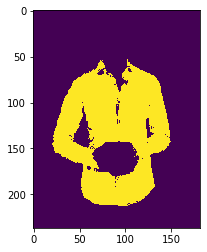

In [7]:
img = cv2.imread('pic1.png')

hsv =cv2.cvtColor(img,cv2.COLOR_BGR2HSV)

low_rag = np.array([161, 155, 84])
high_rag = np.array([179, 255, 255])

mask =cv2.inRange(hsv,low_rag,high_rag)


plt.imshow(mask)

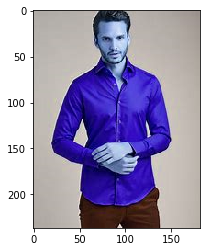

In [8]:
plt.imshow(img)

In [13]:
img = cv2.imread('pic1.png')

hsv=cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
#for red 
red_lower=np.array([136,87,111],np.uint8)
red_upper=np.array([180,255,255],np.uint8)
#fro blue
blue_lower=np.array([99,115,150],np.uint8)
blue_upper=np.array([110,255,255],np.uint8)
#for yellow
yellow_lower=np.array([22,60,200],np.uint8)
yellow_upper=np.array([60,255,255],np.uint8)
#for MASK 
red=cv2.inRange(hsv, red_lower, red_upper)
blue=cv2.inRange(hsv,blue_lower,blue_upper)
yellow=cv2.inRange(hsv,yellow_lower,yellow_upper)

#Morphological transformation, Dilation

kernal = np.ones((5 ,5), "uint8")
red=cv2.dilate(red, kernal)
res=cv2.bitwise_and(img, img, mask = red)

blue=cv2.dilate(blue,kernal)
res1=cv2.bitwise_and(img, img, mask = blue)

yellow=cv2.dilate(yellow,kernal)
res2=cv2.bitwise_and(img, img, mask = yellow)
#fro red 
_ ,contours ,hierarchy=cv2.findContours(red,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

for pic, contour in enumerate(contours):
    area = cv2.contourArea(contour)
    if(area>300):
        x,y,w,h = cv2.boundingRect(contour)	
        img = cv2.rectangle(img,(x,y),(x+w,y+h),(0,0,255),2)
        cv2.putText(img,"RED color",(x,y),cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255))
#Tracking the Blue Color
(_,contours,hierarchy)=cv2.findContours(blue,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
for pic, contour in enumerate(contours):
    area = cv2.contourArea(contour)
    if(area>300):
        x,y,w,h = cv2.boundingRect(contour)	
        img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
        cv2.putText(img,"Blue color",(x,y),cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255,0,0))
#Tracking the yellow Color
(_,contours,hierarchy)=cv2.findContours(yellow,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
for pic, contour in enumerate(contours):
    area = cv2.contourArea(contour)
    if(area>300):
        x,y,w,h = cv2.boundingRect(contour)	
        img = cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
        cv2.putText(img,"yellow  color",(x,y),cv2.FONT_HERSHEY_SIMPLEX, 1.0, (0,255,0))
            
            
#cv2.imshow("Redcolour",red)
cv2.imshow("Color Tracking",img) 

ValueError: not enough values to unpack (expected 3, got 2)